# Textures and local image statistics

In [1]:
import os
import nibabel
import numpy as np
import matplotlib.pyplot as plt

from math import ceil

from ia_mri_tools.features import riff

plt.ion()
plt.style.use('seaborn-white')

def im_show(h, n, m, i, title=None, colorbar=True, vmin=-100, vmax=100):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=vmin, vmax=vmax)
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def im_show_scale(h, n, m, i, title=None, colorbar=True, pmin=2, pmax=98):
    plt.subplot(n, m, i)
    plt.imshow(h[:, ::-1].transpose(), cmap='gray', vmin=np.percentile(h, pmin), vmax=np.percentile(h, pmax))
    plt.axis('off')
    if title:
        plt.title(title)
    if colorbar:
        plt.colorbar()


def load_data(dset, z=None, data_path='data/HCP/100307'):
    """

    :param dset: string 'T1', 'T2', 'T1r', 'T2r', or 'aparc+aseg'
    :param z: integer slice number
    :param data_path: path to the data
    :return: data as a numpy array
    """

    if dset == 'T1':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc.nii.gz')
    elif dset == 'T2':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc.nii.gz')
    elif dset == 'T1r':
        dset_path = os.path.join(data_path, 'T1w_acpc_dc_restore.nii.gz')
    elif dset == 'T2r':
        dset_path = os.path.join(data_path, 'T2w_acpc_dc_restore.nii.gz')
    elif dset == 'aparc+aseg':
        dset_path = os.path.join(data_path, 'aparc+aseg.nii.gz')
    else:
        raise NameError('Unknown data set name.')

    # read the volume
    data = nibabel.load(dset_path).get_data()
    # select a slice if needed
    if z:
        data = data[:, :, z]

    return data



## An example image

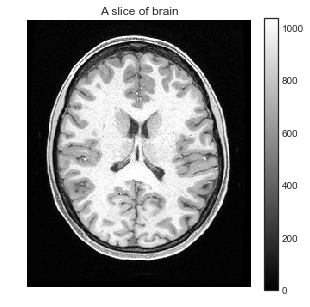

In [2]:
# Load a slice from an image and convert to doubles.
data = load_data('T1r', z=120).astype(np.double)

plt.figure(figsize=[5,5])
im_show_scale(data, 1,1,1, 'A slice of brain')

## Rotationally Invariant Frontend Features

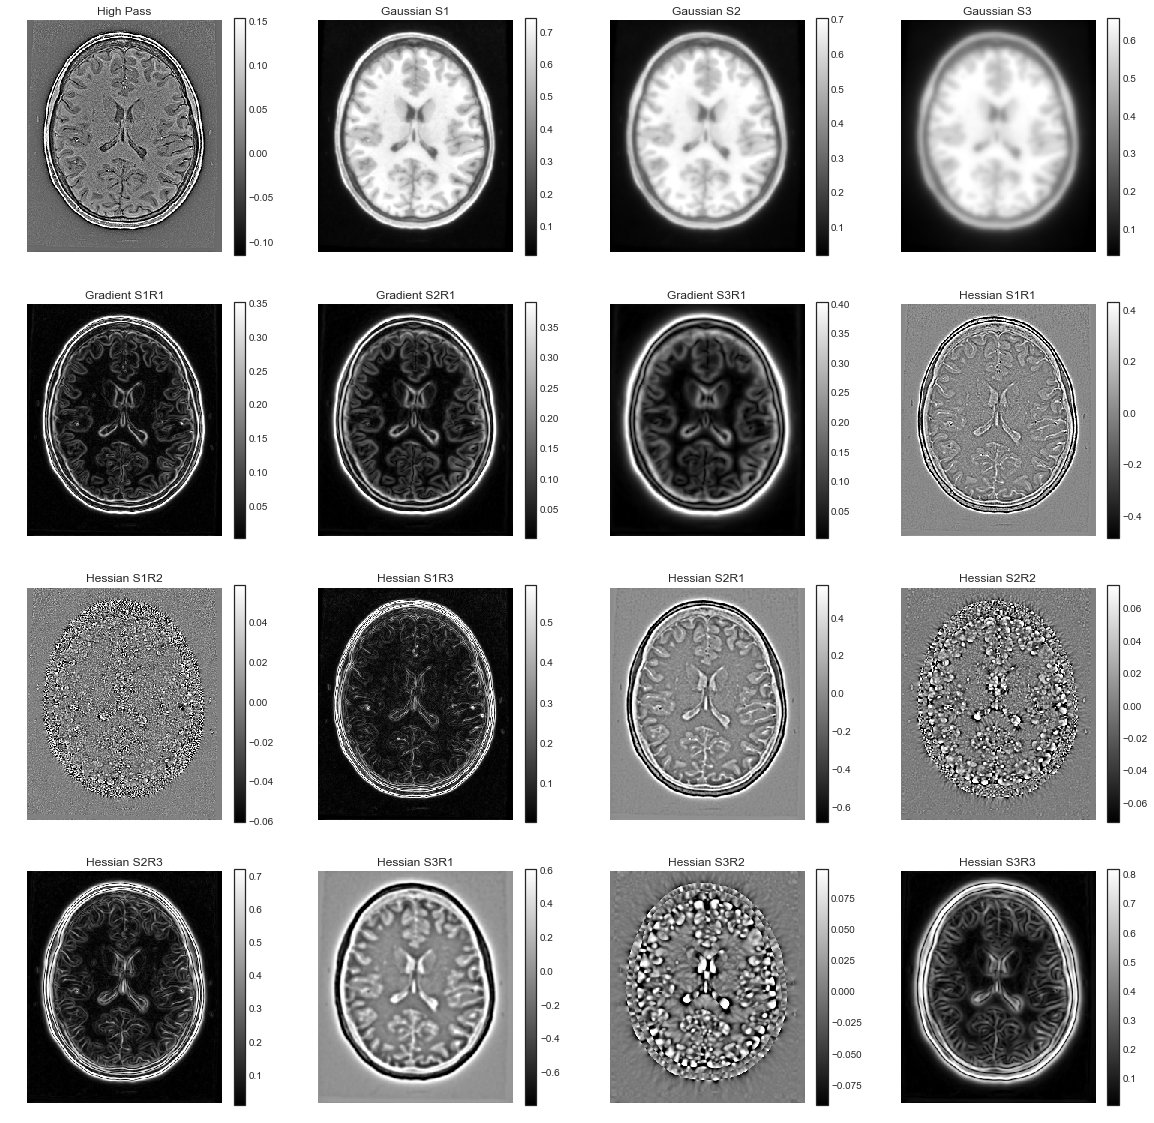

In [3]:
feats, names = riff(data)

nf = len(feats)
ncols = int(np.ceil(np.sqrt(nf)))

plt.figure(figsize=[ncols*5, ncols*5])
for n in range(nf):
    im_show_scale(feats[n], ncols,ncols,n+1, names[n])
